Link to my Github:

https://github.com/Mishel-Gershkovich/classifiers-work-on-simple-dataset

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [101]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

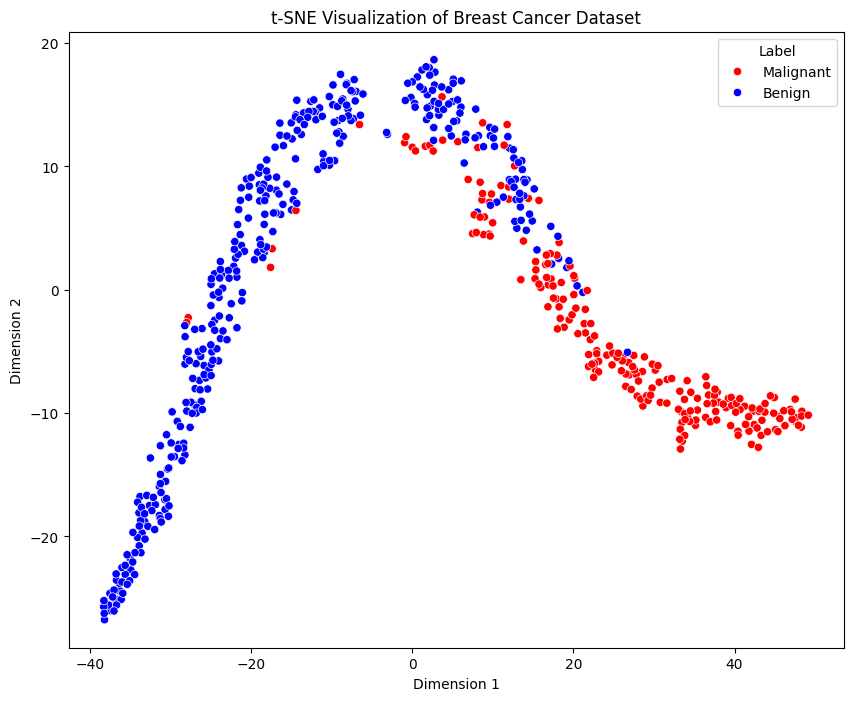

In [102]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = my_data.data
y = my_data.target

tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)

# Create a DataFrame for visualization
df = pd.DataFrame({
    "Dimension 1": X_embedded[:, 0],
    "Dimension 2": X_embedded[:, 1],
    "Label": y
})


df["Label"] = df["Label"].map({0: "Malignant", 1:"Benign" })

# Visualize the data using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Dimension 1",
    y="Dimension 2",
    hue="Label",
    palette={"Malignant": "red","Benign": "blue"},
    #alpha=0.7,
    #s=60
)
plt.title("t-SNE Visualization of Breast Cancer Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Label")
plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [103]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=0)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score


model_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15,
                                             min_samples_split=4, min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0, max_features=None,
                                             random_state=66, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                             class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
model_decision_tree.fit(X_train, Y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4,
                       random_state=66, splitter='random')

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [105]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=6, min_samples_split=4, min_samples_leaf=4,
                                             min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=20, min_impurity_decrease=0.0,
                                             bootstrap=True, oob_score=False, n_jobs=None, random_state=45, verbose=0, warm_start=False,
                                             class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=6, max_leaf_nodes=20,
                       min_samples_leaf=4, min_samples_split=4,
                       random_state=45)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [106]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(estimator=None, n_estimators=100,
                                    learning_rate=1.5, algorithm='SAMME.R', random_state=55)
model_adaboost.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1.5, n_estimators=100, random_state=55)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

results = {}

# List of models and their names
models = {
    "Decision Tree": model_decision_tree,
    "Random Forest": model_random_forest,
    "AdaBoost": model_adaboost,
}

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average="weighted")
    recall = recall_score(Y_test, y_pred, average="weighted")
    f1 = f1_score(Y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(Y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
    }

# Print results for each model
for name, metrics in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])

# I сhoose the decisive metric to be f-sorce because its tiebreaker in my experiments.
# Precision is also tiebreaker between the best two results i got, but i go with f-sorce.
decisive_metric = "F1-Score"

# Compare and declare the winner
best_model = max(results.items(), key=lambda x: x[1][decisive_metric])
print(f"\nWinner: {best_model[0]} with {decisive_metric} = {best_model[1][decisive_metric]:.4f}")


Decision Tree Results:
Accuracy: 0.9561
Precision: 0.9604
Recall: 0.9561
F1-Score: 0.9564
Confusion Matrix:
[[47  0]
 [ 5 62]]

Random Forest Results:
Accuracy: 0.9737
Precision: 0.9738
Recall: 0.9737
F1-Score: 0.9736
Confusion Matrix:
[[45  2]
 [ 1 66]]

AdaBoost Results:
Accuracy: 0.9737
Precision: 0.9739
Recall: 0.9737
F1-Score: 0.9737
Confusion Matrix:
[[46  1]
 [ 2 65]]

Winner: AdaBoost with F1-Score = 0.9737
